In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import folium
import os
import sys
import abstract_flows.arrow as arrow
import abstract_flows.grid as grid
import abstract_flows.flows as flows
from load_data import load_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

Datos sintéticos

In [100]:
bf =[]

for i in range(1, 4):
    f = np.load(f'synthetic_data/f{i}.npy')
    bf.append(f)

In [101]:
for f in bf:
    print('Flow')
    print(f)

Flow
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Flow
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Flow
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [102]:
laplacian = np.load('synthetic_data/laplacian.npy')
print('Laplacian')
print(laplacian)

Laplacian
[[ 1.         -0.5         0.         -0.40824829]
 [-0.5         1.          0.         -0.40824829]
 [ 0.          0.          1.         -0.57735027]
 [-0.40824829 -0.40824829 -0.57735027  1.        ]]


In [103]:
fs = np.load('synthetic_data/flows.npy')
print('Flows')
print(fs[0:2])

Flows
[[[1.  0.  0.  0. ]
  [0.  1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]

 [[0.9 0.  0.  0. ]
  [0.1 1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]]


Resultados

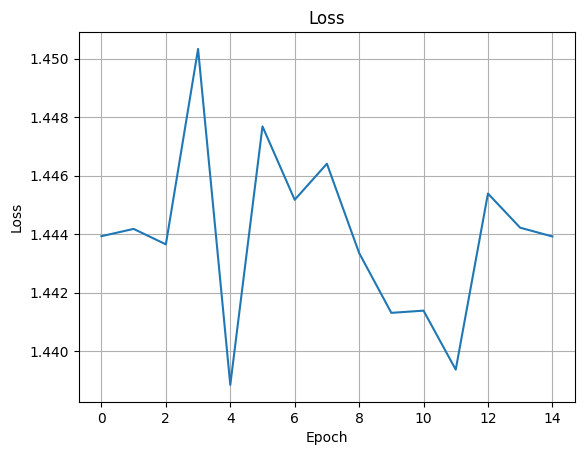

In [184]:
loss = np.load('results_little_experiment/loss.npy')
plt.plot(loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [185]:
D = np.load('results_little_experiment/dictionary.npy')
print(D)
D.sum(axis=0)

[[0.35678554 0.27074546 0.19021434]
 [0.18369238 0.20391996 0.2883368 ]
 [0.16613384 0.23072845 0.34286973]
 [0.29338825 0.29460615 0.17857908]]


array([1., 1., 1.], dtype=float32)

In [186]:
weights = np.load('results_little_experiment/weights.npy')
print(weights[0])
weights[0].sum(axis=1)

[[0.26234514 0.22617196 0.2900622  0.22142072]
 [0.31915137 0.22245532 0.21264456 0.24574864]
 [0.24318138 0.21804547 0.2691965  0.26957667]]


array([1.       , 0.9999999, 1.       ], dtype=float32)

In [187]:
fs[0]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [188]:
print('Reconstruction')
print(D@weights[0])

Reconstruction
[[0.22626632 0.18239902 0.21226758 0.19681239]
 [0.18339027 0.14977968 0.17426395 0.16851524]
 [0.20060124 0.16366278 0.18955162 0.18591635]
 [0.21442005 0.17083126 0.1958201  0.18550205]]
